# Explore dataset

To check if observation cadence are the same (e.g recordings of the brightness every 30 min or 4min?)
Or take a curve-fitting model not to "take into account the temporal dependence structure in the data. This also allows to have irregularly spaced observations" (like Prophet, Facebook's forecasting model -> to check if we can use this model in predicting a transit phenomenon)

# Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define functions

In [42]:
# Create Function to explore the dataframes
def explore(df: pd.DataFrame) -> None:
    """
    Function to print general information about the dataframe
    """
    print("********** 1. General info of data **********")
    print(df.info())
    
    print("\n********** 2. Shape of data **********")
    print(f"Number of rows: {len(df)}")
    print(f"Number of columns: {len(df.columns)}")
    
    print("\n********** 3. Number of missing values per column **********")
    print(df.isnull().sum())
    
    print("\n********** 4. Number of duplicated values **********")
    print(df.duplicated().sum())
    
    print("\n********** 5. Number of unique values per column (NaN non included) **********")
    print(df.nunique())
    
    print("\n********** 6. Statistical info of each column **********")
    return df.describe(include='all').T

# Load data

* PC = planet candidate
* AFP = astrophysical false positive
* NTP = non-transiting phenomena
* UNK = unknown

In [123]:
# load data
kepler_tce_df = pd.read_csv("/Users/derrickvanfrausum/BeCode_AI/git-repos/astro/core/assets/data/Kepler/thread_csv_all.csv")
kepler_tce_df.head()

,time,flux,kepid,best_fit_period,av_training_set
0,-3.917173,1.000192,11551692,7.836,PC
1,-3.917173,1.000192,11551692,7.836,PC
2,-3.917173,1.000192,11551692,7.836,PC
3,-3.912650,0.999829,11551692,7.836,PC
4,-3.912650,0.999829,11551692,7.836,PC


In [43]:
explore(kepler_tce_df)

********** 1. General info of data **********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6059996 entries, 0 to 6059995
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   time             float64
 1   flux             float64
 2   kepid            int64  
 3   best_fit_period  float64
 4   av_training_set  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 231.2+ MB
None

********** 2. Shape of data **********
Number of rows: 6059996
Number of columns: 5

********** 3. Number of missing values per column **********
time               0
flux               0
kepid              0
best_fit_period    0
av_training_set    0
dtype: int64

********** 4. Number of duplicated values **********
1923360

********** 5. Number of unique values per column (NaN non included) **********
time               3662900
flux               3662327
kepid                   63
best_fit_period        538
av_training_set          4
dtype: int64

*******

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
time,6059996.0,NaN,NaN,NaN,0.00971,1.190015,-4.993318,-0.335372,0.006307,0.350051,4.98593
flux,6059996.0,NaN,NaN,NaN,0.999857,0.004747,0.757273,0.999759,0.999999,1.000233,1.15607
kepid,6059996.0,NaN,NaN,NaN,11353050.491878,130700.205126,11200767.0,11252617.0,11288686.0,11512246.0,11599937.0
best_fit_period,6059996.0,NaN,NaN,NaN,2.99191,2.835276,0.5,0.808,1.49,5.317,9.996
av_training_set,6059996,4,AFP,2275513,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocess data

In [124]:
# Remove duplicates
kepler_tce_df.drop_duplicates(inplace=True)

In [125]:
# list flux values into 1 vector per observation mission

# group DataFrame by "kepid", "best_fit_period", "av_training_set"  and list flux values per group
cols = ["kepid", "best_fit_period", "av_training_set", "flux"]
kepler_tce_df = kepler_tce_df[cols].groupby(cols[:-1]).flux.apply(np.array)

# change name
kepler_tce_df = kepler_tce_df.reset_index(name="flux_vector")
kepler_tce_df.head()

,kepid,best_fit_period,av_training_set,flux_vector
0,11200767,1.245,AFP,"[0.9997368076321762, 1.0002041697102615, 0.999..."
1,11200767,2.488,AFP,"[0.9999276670031928, 0.9999154244156816, 1.000..."
2,11200767,2.489,AFP,"[0.9997009438000204, 0.9999473832849212, 1.000..."
3,11200767,2.490,AFP,"[1.0001471507772384, 1.0000846552863245, 1.000..."
4,11201483,0.744,UNK,"[1.0010459670716594, 1.000355875794957, 0.9996..."


# Plot data

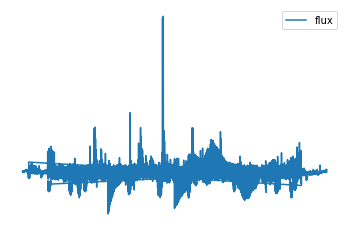

In [7]:
# sample_df = kepler_tce_df.loc[kepler_tce_df["kepid"] == 11551692, ["time", "flux"]]
# sample_df.plot(x="time", y="flux")
# plt.show()

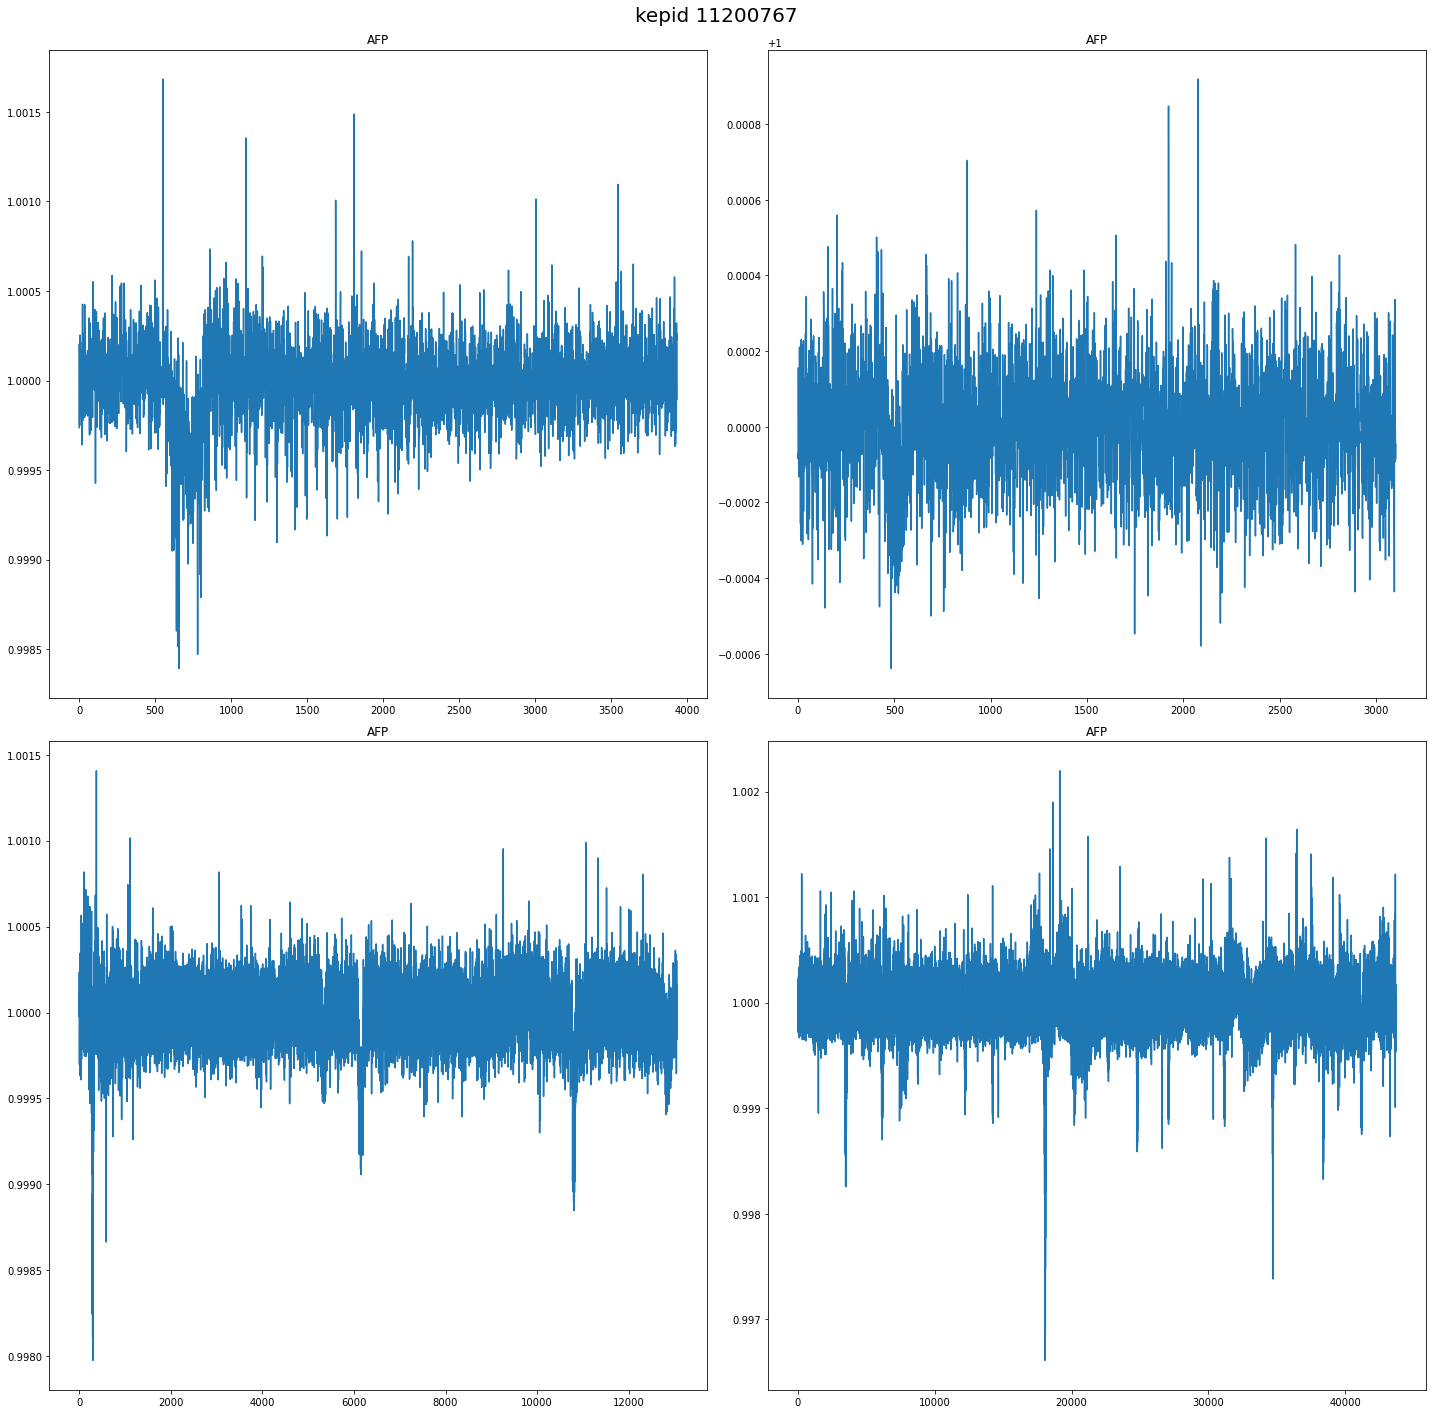

In [149]:
# choose star to plot
kepid = 11200767

# get number of observation missions for that star
nb_missions = kepler_tce_df[kepler_tce_df.kepid == kepid].flux_vector.count()

# set subplots grid
LEN_ROWS: int = 2
LEN_COLS: int = 2
fig, ax = plt.subplots(nb_missions//LEN_ROWS,LEN_COLS, figsize=(20,20))

# plot all observation missions
for i in range(nb_missions):
    
    # define subplot
    ax_i=ax[i//LEN_ROWS,i - LEN_COLS*(i//LEN_COLS)]
    # plt.subplot(330 + 1 + i)
    
    # get flux data
    flux_vector = kepler_tce_df[kepler_tce_df.kepid == kepid].flux_vector[i]
    
    # plot flux data
    ax_i.plot(flux_vector)
    
    # get label
    label = kepler_tce_df[kepler_tce_df.kepid == kepid].av_training_set[i]
    
    # set subplot label
    ax_i.set_title(label)

# show the figure
fig.suptitle(f'kepid {kepid}', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

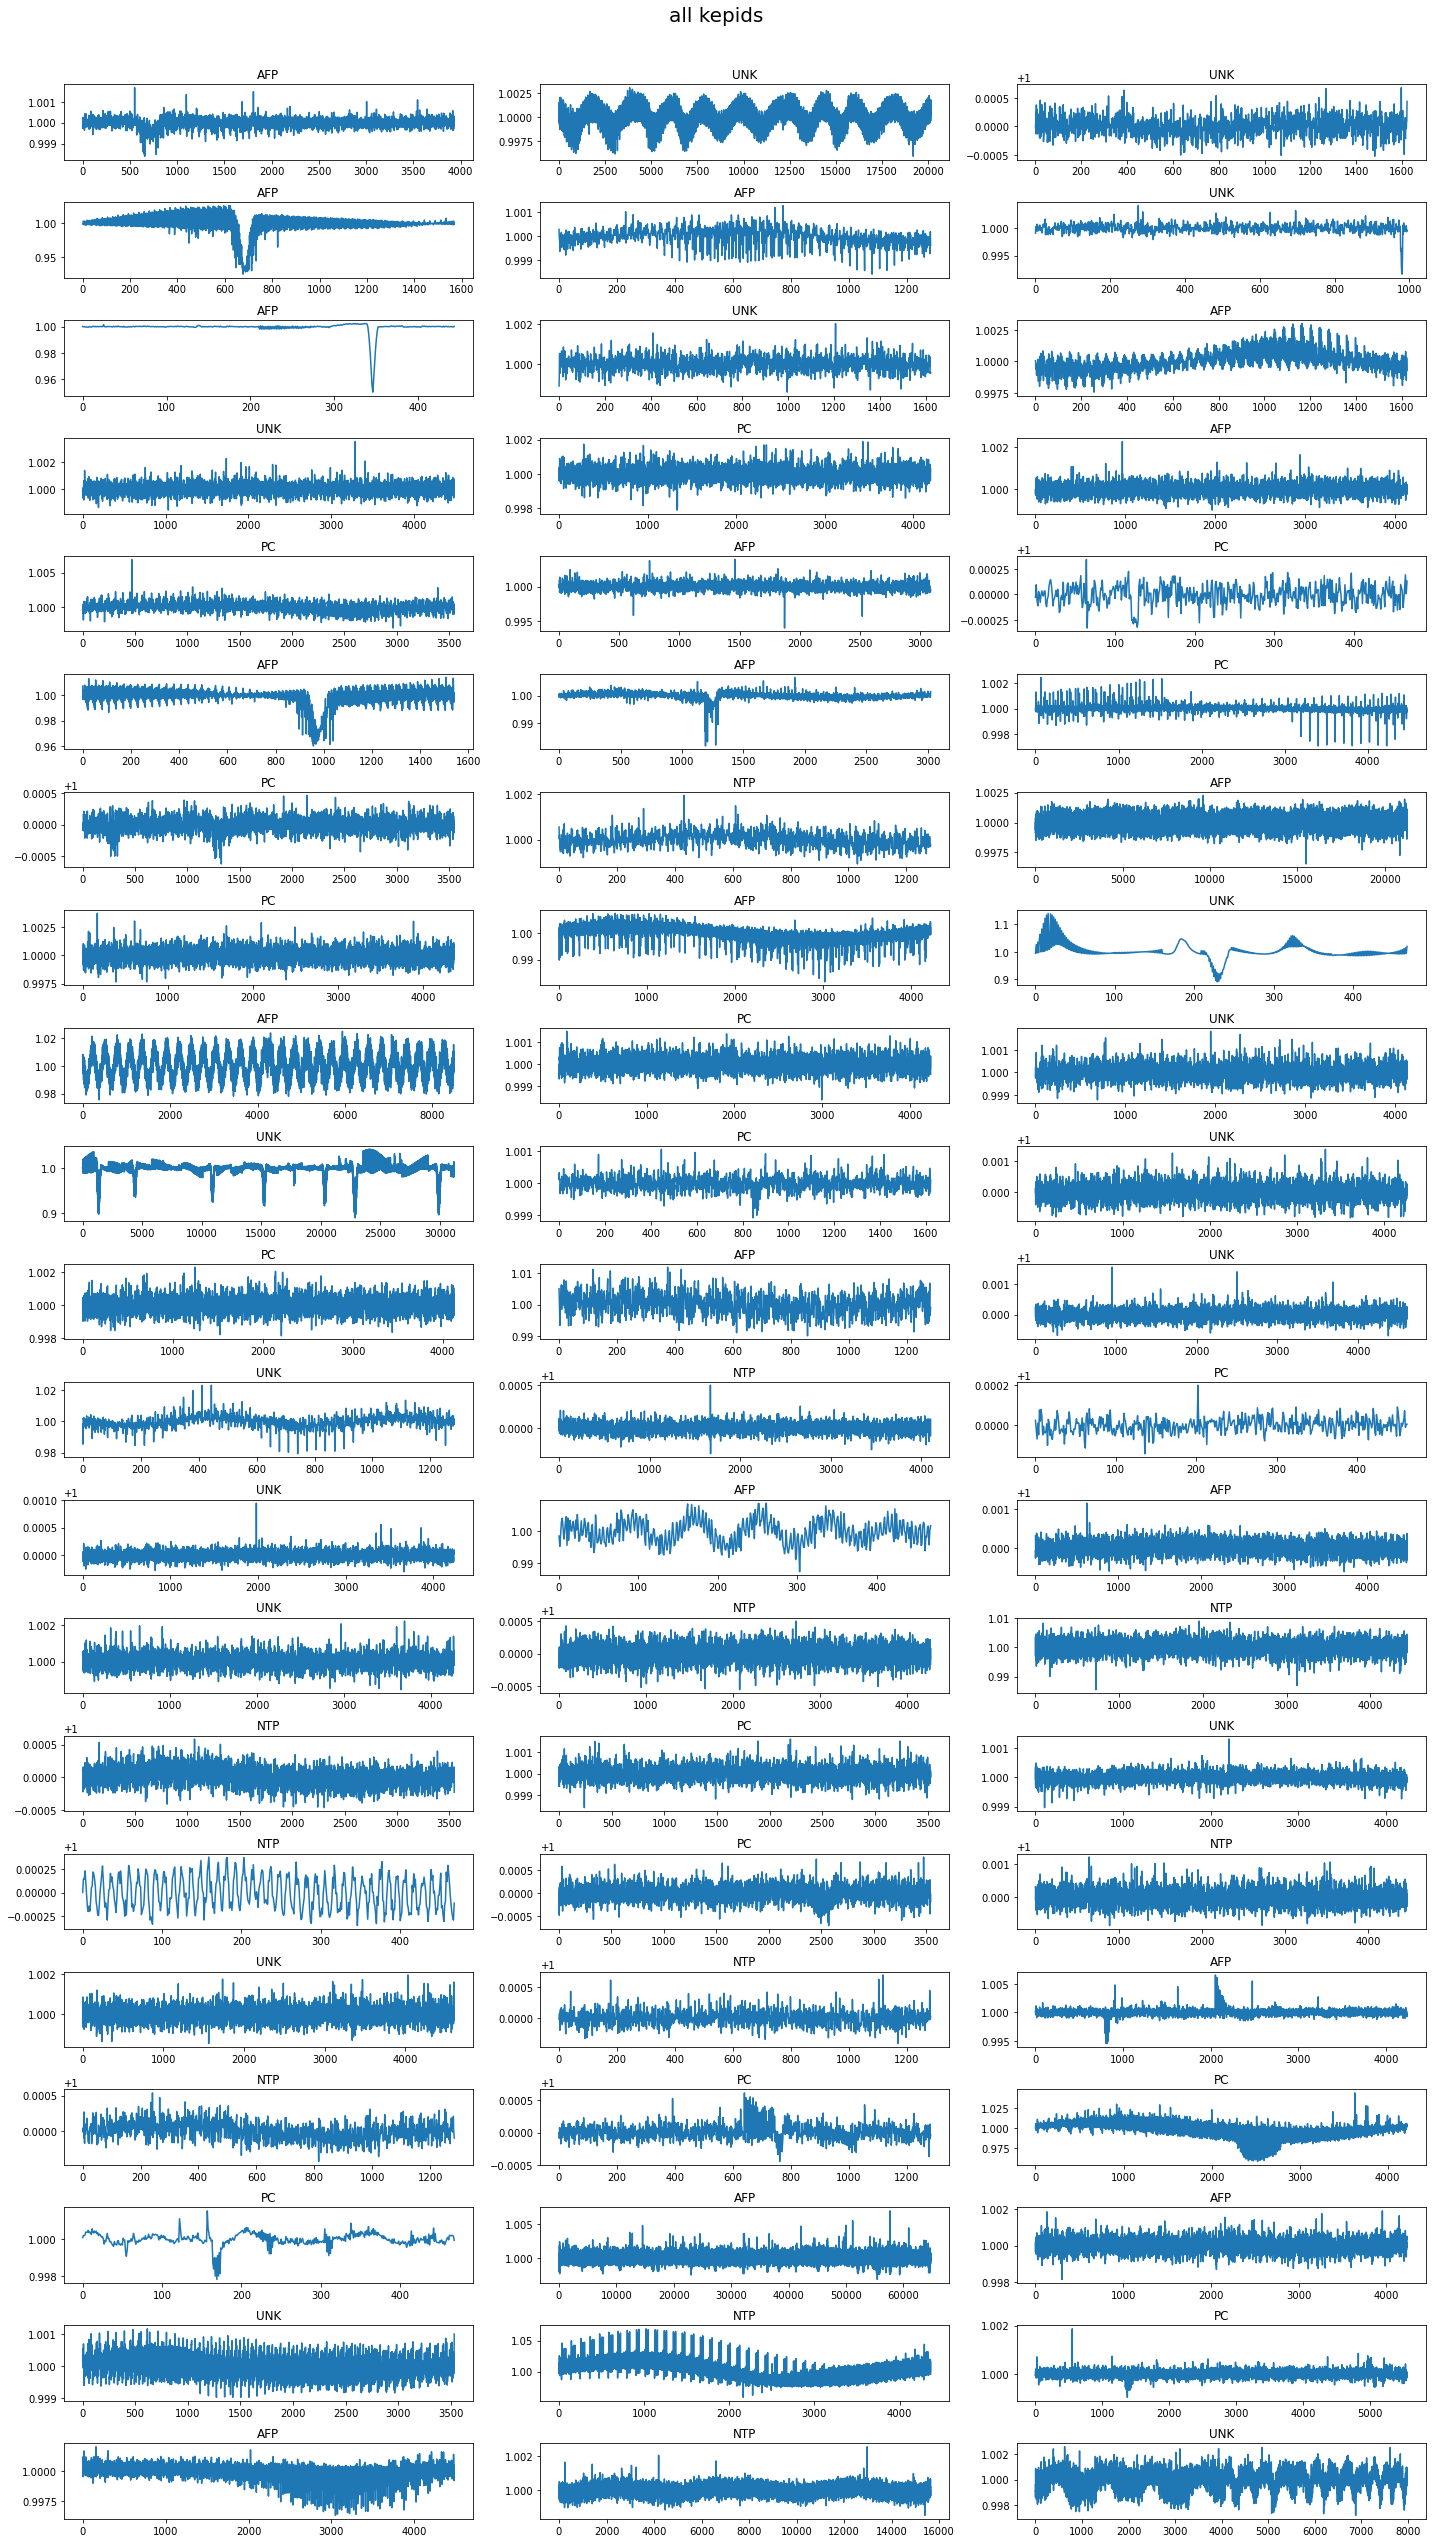

In [178]:
# plot 1st lightcurve of all stars

# get stars kepids
kepids = kepler_tce_df.kepid.unique()

# set subplots grid
LEN_ROWS: int = 3
LEN_COLS: int = 3
fig, ax = plt.subplots(len(kepids)//LEN_ROWS,LEN_COLS, figsize=(20,36))

# plot all observation missions
for i, kepid in enumerate(kepids):
    
    # define subplot
    ax_i=ax[i//LEN_ROWS,i - LEN_COLS*(i//LEN_COLS)]
    
    # get flux data
    flux_vector = kepler_tce_df[kepler_tce_df.kepid == kepid].flux_vector.values[0]
    
    # plot flux data
    ax_i.plot(flux_vector)
    
    # get label
    label = kepler_tce_df[kepler_tce_df.kepid == kepid].av_training_set.values[0]
    
    # set subplot label
    ax_i.set_title(label)

# show the figure
fig.suptitle(f'all kepids', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()